In [50]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [51]:
# 총 768개 row
all_files=glob.glob("./data_jobinfluence/*.xls")

In [52]:
all_files_data=[]

In [53]:
for file in all_files : 
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

In [54]:
print(len(all_files_data))

8


In [55]:
# df 병합
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Does working with the Veder Contact Method inf...,"Boersma, P.; Dröes, R. M.; Lissenberg-Witte,...",Cambridge University Press,2017
1,NaN,2,Technological disruption and employment: The i...,"Brougham, David; Haar, Jarrod","Elsevier Science B.V., Amsterdam.",2020
2,NaN,3,Affective well-being and within-day beliefs ab...,"Daniels, K.; Wimalasiri, V.; Beesley, N.; Chey...",THE BRITISH PSYCHOLOGICAL SOCIETY,2012
3,NaN,4,Commitment to Social Justice and its Influence...,"Vincent, David; Marmo, Suzanne",Taylor and Francis,2018
4,NaN,5,Salesperson Perceptions of Ethical Behaviors: ...,"Pettijohn, C.; Pettijohn, L.; Taylor, A. J.",Springer Science + Business Media,2008
...,...,...,...,...,...,...
763,NaN,96,Organizational Climate Perception and its Infl...,"Sontakki, B. S.;Sundaraswamy, B.","Asian Fisheries Society, Indian Branch",1996
764,NaN,97,Does work engagement mediate the influence of ...,"Chen, Chien-Yu",Emerald Group Publishing Limited,2019
765,NaN,98,HOW SOCIAL DOMINANCE ORIENTATION AND JOB STATU...,"AQUINO, K.; STEWART, M. M.; REED, A.",PERSONNEL PSYCHOLOGY INC,2005
766,NaN,99,Understanding teleworkers’ technostress and it...,Ayoung Suh; Jumin Lee,Emerald Group Publishing,2017


In [56]:
thesis_title = all_files_data_concat['제목']

In [57]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [58]:
words=[]

In [59]:
for title in thesis_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 익명함수, 클로저
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [60]:
# 2차원 -> 1차원
words2 = reduce(lambda x, y : x+y, words)
print(words2[:10])

['working', 'veder', 'contact', 'method', 'influence', 'job', 'satisfaction', 'caregiver', 'non', 'randomized']


In [61]:
count = Counter(words2)
count

Counter({'working': 13,
         'veder': 1,
         'contact': 3,
         'method': 5,
         'influence': 667,
         'job': 822,
         'satisfaction': 294,
         'caregiver': 1,
         'non': 6,
         'randomized': 2,
         'controlled': 2,
         'trial': 3,
         'nursing': 11,
         'home': 6,
         'people': 5,
         'dementia': 2,
         'technological': 2,
         'disruption': 1,
         'employment': 10,
         'insecurity': 11,
         'turnover': 37,
         'intention': 44,
         'multi': 2,
         'country': 5,
         'study': 63,
         'affective': 7,
         'well': 12,
         'within': 3,
         'day': 2,
         'belief': 7,
         'demand': 18,
         'work': 100,
         'performance': 101,
         'experience': 7,
         'sampling': 1,
         'commitment': 62,
         'social': 35,
         'justice': 8,
         'retention': 5,
         'nonprofit': 1,
         'middle': 4,
         'manager': 2

In [62]:
word_count = dict()

In [68]:
for tag, counts in count.most_common(20) : 
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag,counts))

job : 822
influence : 667
satisfaction : 294
factor : 119
performance : 101
work : 100
influencing : 94
employee : 92
nurse : 65
organizational : 64
study : 63
commitment : 62
among : 56
stress : 56
role : 48
characteristic : 46
worker : 45
intention : 44
perception : 40
turnover : 37


In [65]:
# 검색어(job, influence) 제거 
del word_count['job']
del word_count['influence']

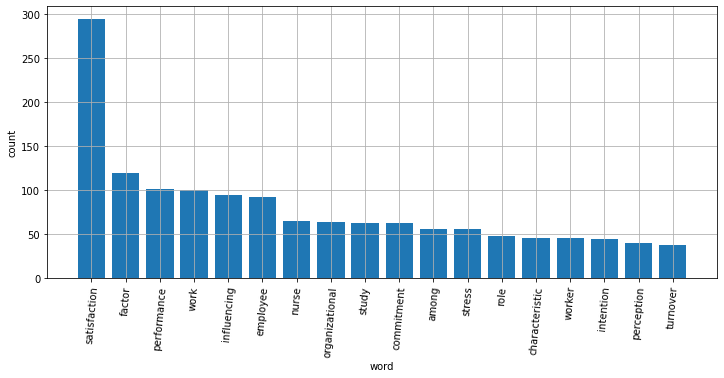

In [66]:
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_values, align='center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation="85")

plt.show()